In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load the dataset
data = pd.read_csv('tobacco_yield_data.csv')

In [28]:
data

,Year,Region,Temperature (°C),Rainfall (mm),Humidity (%),Soil pH,N (kg/ha),P (kg/ha),K (kg/ha),Yield (kg/ha)
0,2006,Tumkur,23.489058,866.676718,53.919790,7.251748,129.644099,82.103447,232.750999,257.896773
1,2019,Hasan,21.732588,883.580449,75.371896,6.520210,103.319741,72.580786,235.787904,256.350057
2,2014,Mysore,24.891591,1348.169073,82.323959,6.480590,195.171730,76.112702,204.452263,406.912803
3,2010,Tumkur,23.306568,1045.073363,83.422988,6.743192,150.149215,71.695673,243.715749,306.464047
4,2007,Hasan,33.879323,957.056779,73.116286,6.958415,150.252391,98.297651,153.017019,285.428812
...,...,...,...,...,...,...,...,...,...,...
4995,2009,Tumkur,25.050108,1165.560506,71.868155,6.181095,141.850958,41.700014,230.085550,343.282489
4996,2022,Hasan,23.786637,1187.223694,58.320152,6.916747,121.754314,87.156129,237.189610,358.164650
4997,2016,Mysore,28.647737,1459.120727,75.725846,6.590002,131.185221,98.159988,201.520759,442.134646
4998,2011,Mysore,34.457643,1444.802996,74.682120,7.211977,158.774149,86.171593,244.182437,457.415937


In [29]:
data.shape

(5000, 10)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              5000 non-null   int64  
 1   Region            5000 non-null   object 
 2   Temperature (°C)  5000 non-null   float64
 3   Rainfall (mm)     5000 non-null   float64
 4   Humidity (%)      5000 non-null   float64
 5   Soil pH           5000 non-null   float64
 6   N (kg/ha)         5000 non-null   float64
 7   P (kg/ha)         5000 non-null   float64
 8   K (kg/ha)         5000 non-null   float64
 9   Yield (kg/ha)     5000 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [31]:
data.isnull().sum()

Year                0
Region              0
Temperature (°C)    0
Rainfall (mm)       0
Humidity (%)        0
Soil pH             0
N (kg/ha)           0
P (kg/ha)           0
K (kg/ha)           0
Yield (kg/ha)       0
dtype: int64

In [32]:

# Visualize the distribution of each feature
def plot_distribution(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


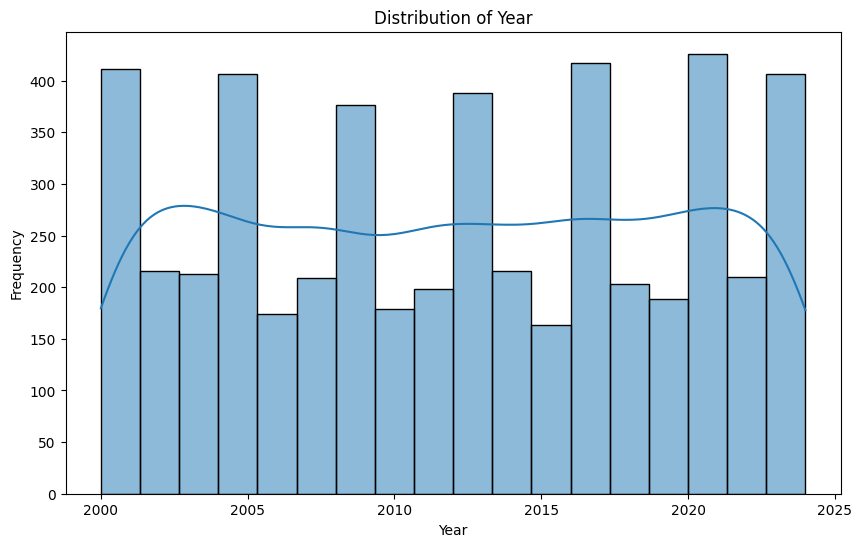

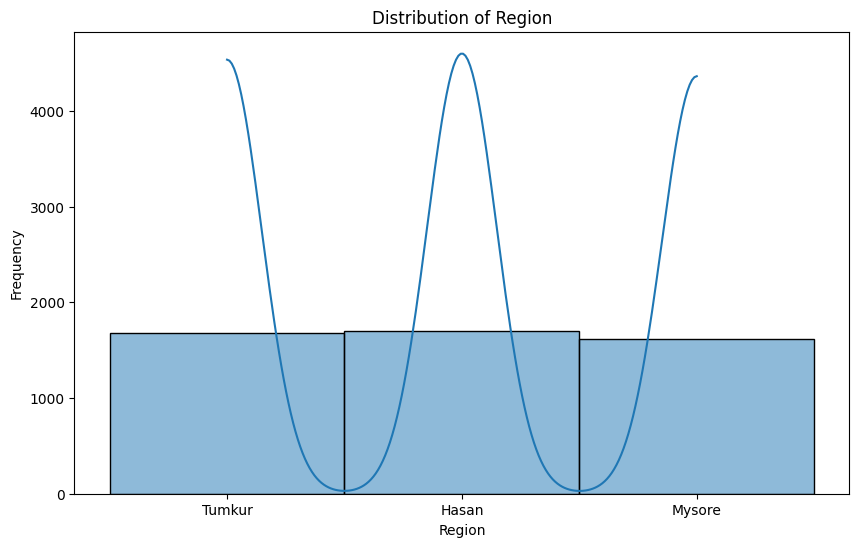

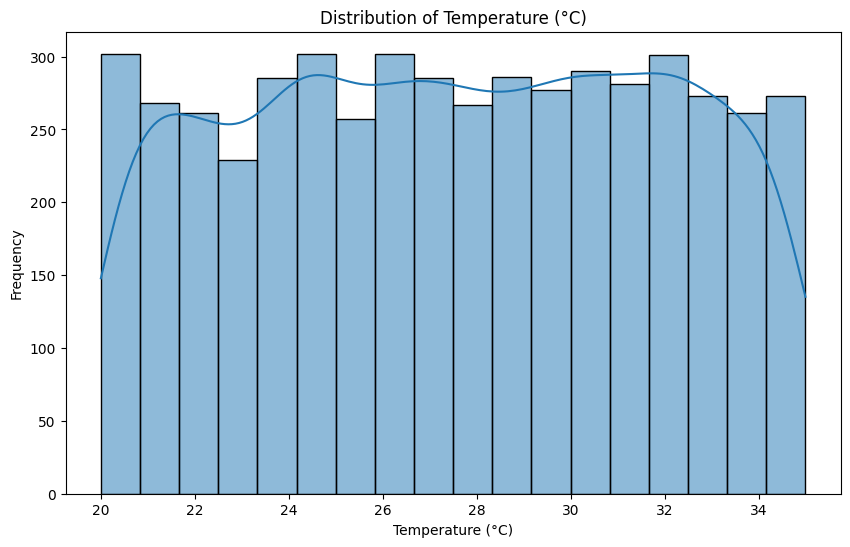

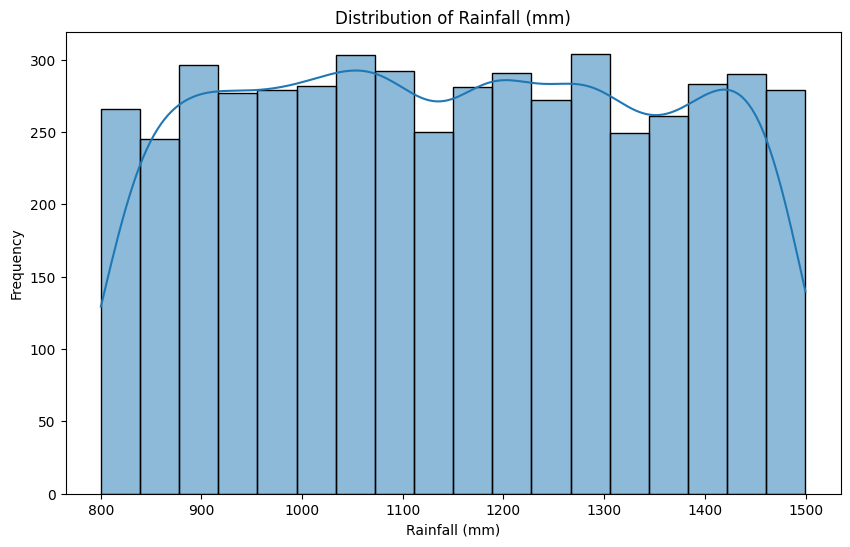

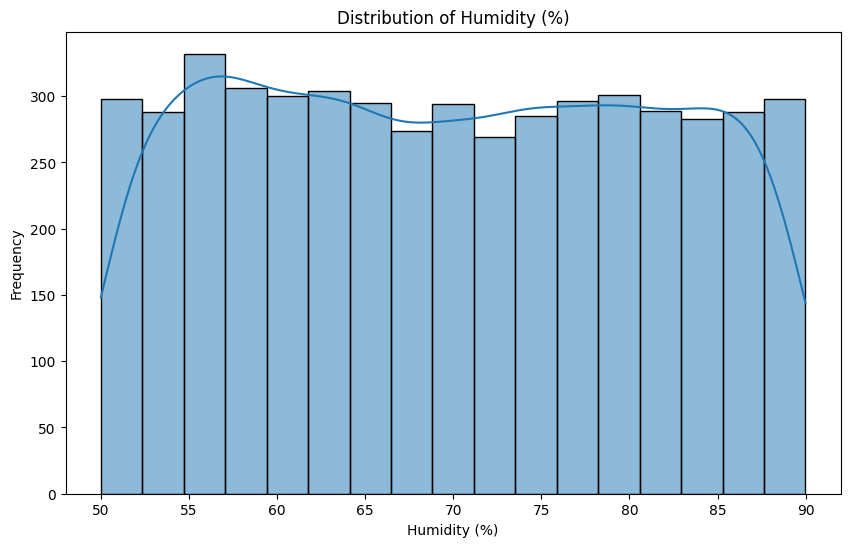

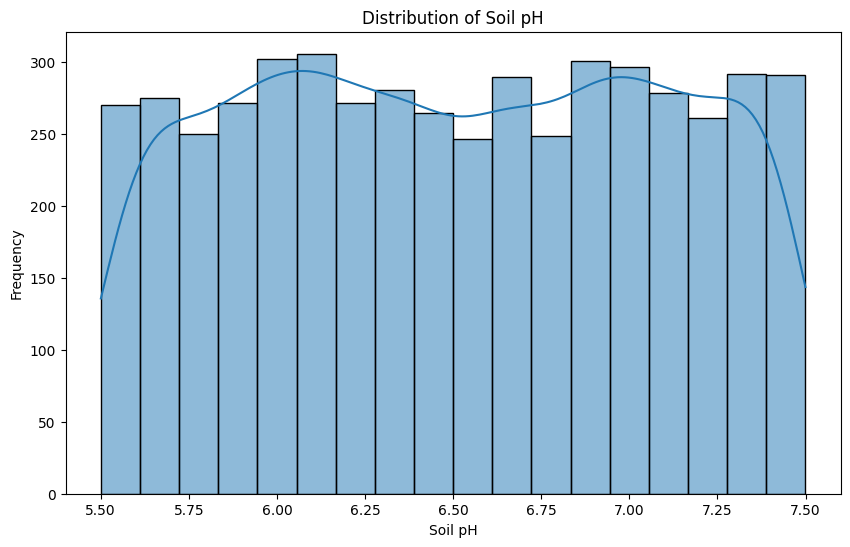

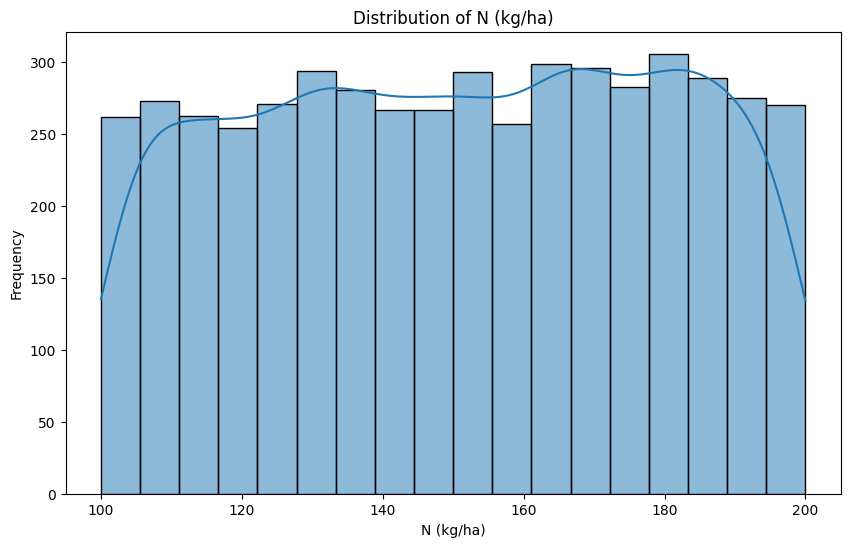

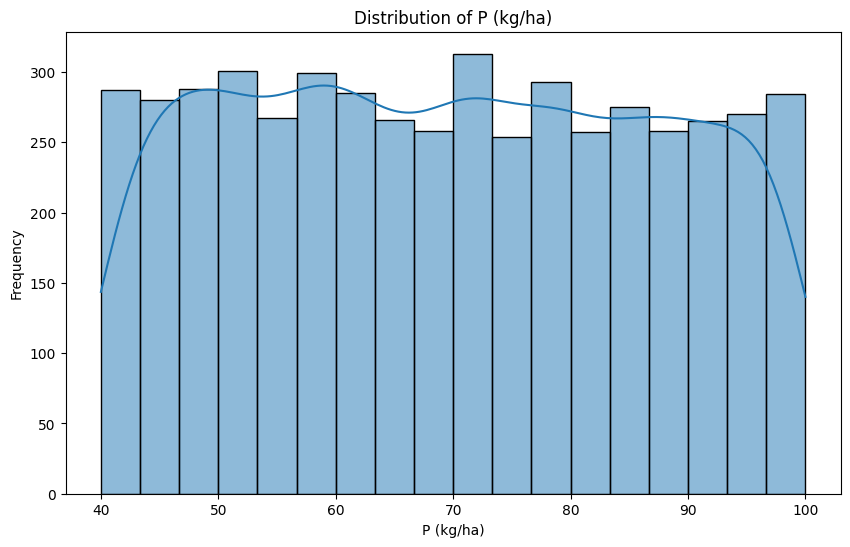

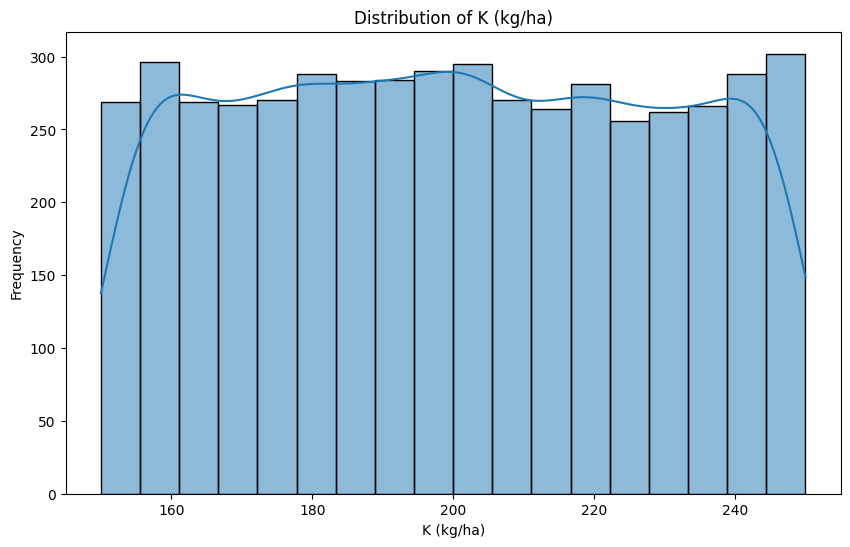

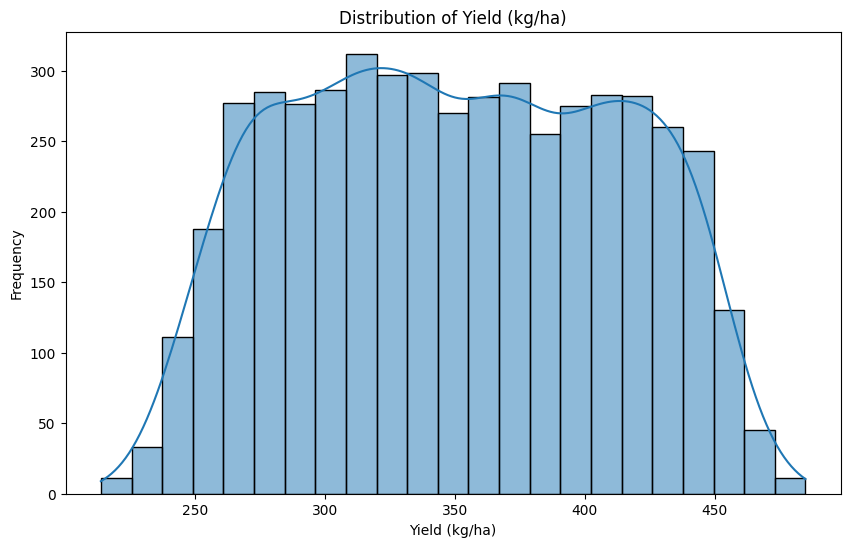

In [33]:
features = data.columns
for feature in features:
    plot_distribution(data, feature)

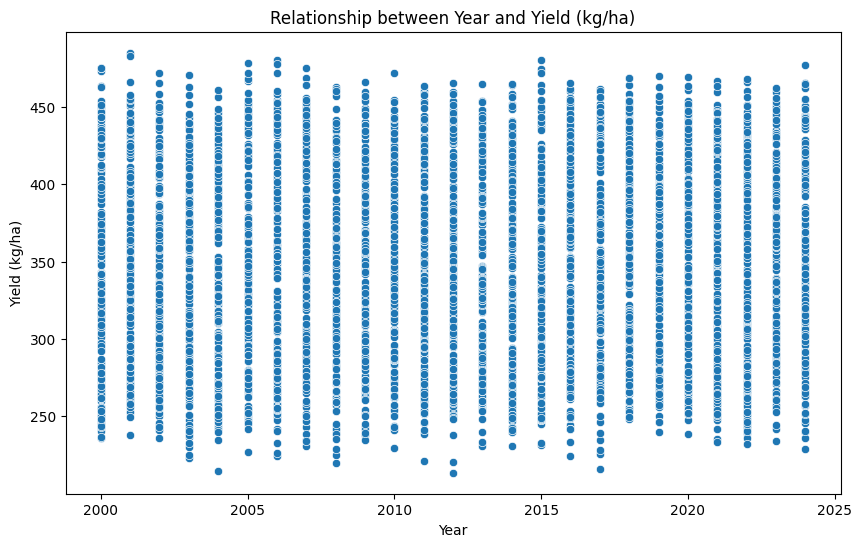

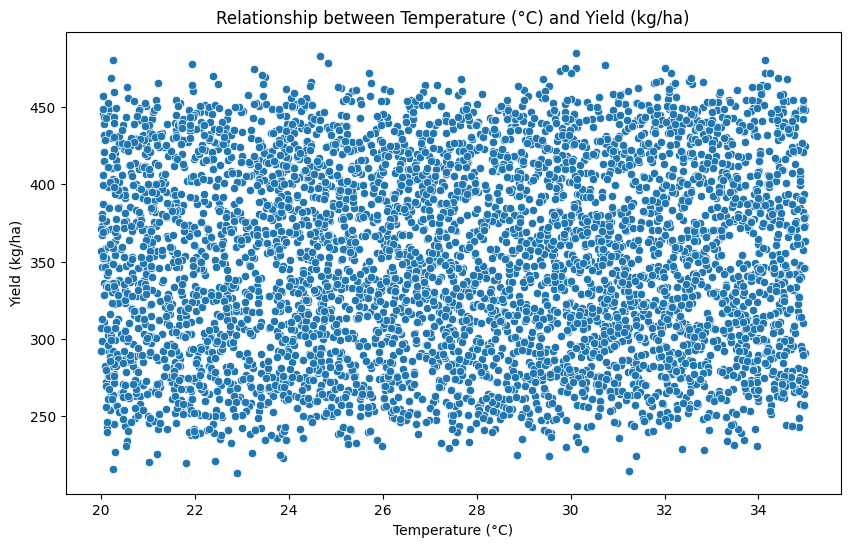

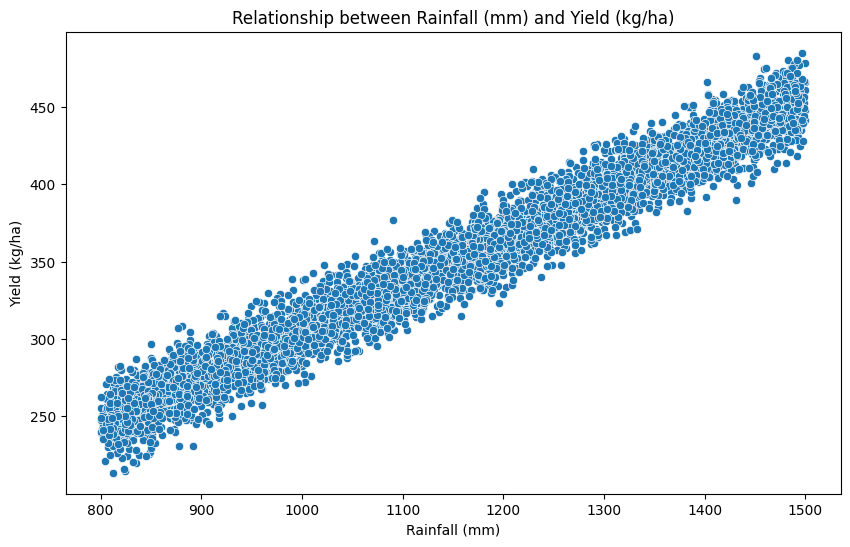

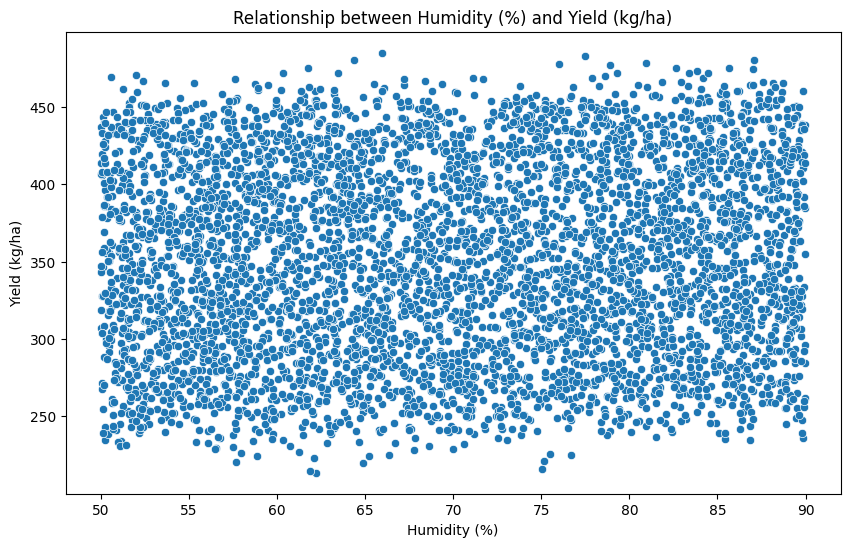

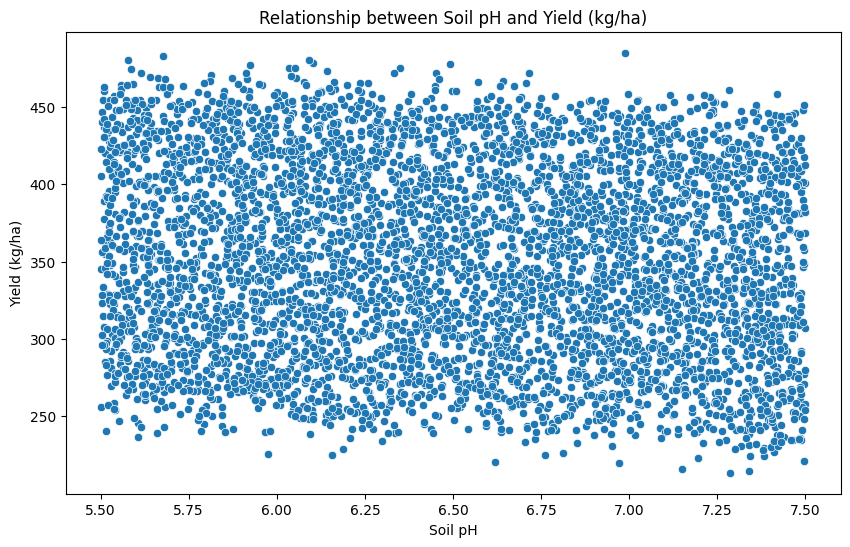

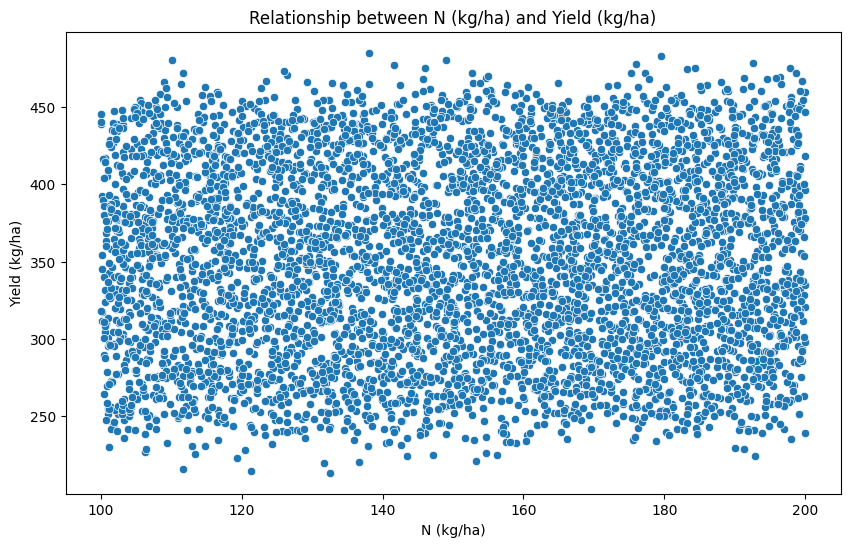

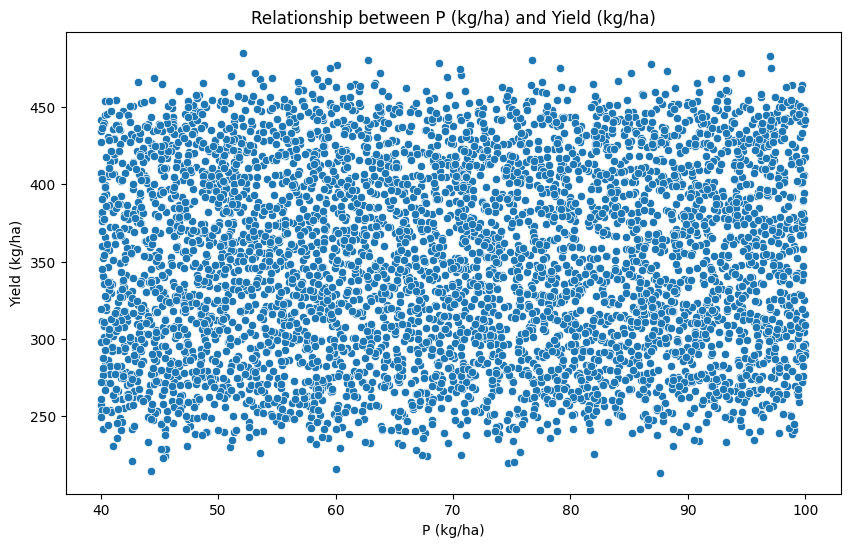

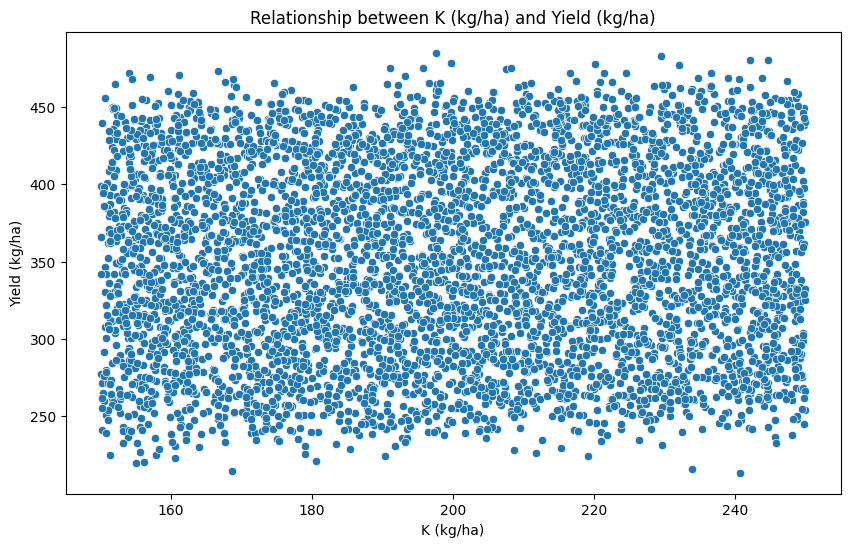

In [34]:
# Visualize relationships between features and the target variable
def plot_relationship(data, feature, target='Yield (kg/ha)'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

for feature in data.drop(columns=['Yield (kg/ha)', 'Region']):
    plot_relationship(data, feature)


In [35]:
corr=data.corr()

ValueError: could not convert string to float: 'Tumkur'

C:\Users\Rohit94\AppData\Local\Temp\ipykernel_5992\3978696611.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


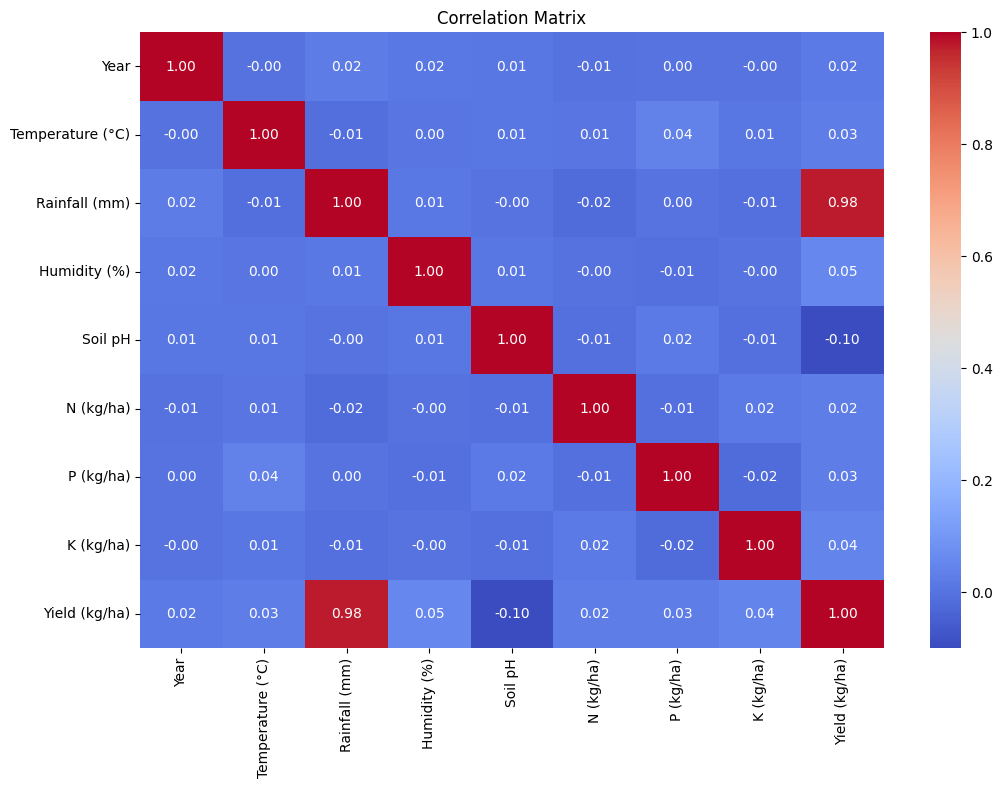

In [11]:
# Check for correlations between features
plt.figure(figsize=(12, 8))
corr=data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
data

,Year,Region,Temperature (°C),Rainfall (mm),Humidity (%),Soil pH,N (kg/ha),P (kg/ha),K (kg/ha),Yield (kg/ha)
0,2006,Tumkur,23.489058,866.676718,53.919790,7.251748,129.644099,82.103447,232.750999,257.896773
1,2019,Hasan,21.732588,883.580449,75.371896,6.520210,103.319741,72.580786,235.787904,256.350057
2,2014,Mysore,24.891591,1348.169073,82.323959,6.480590,195.171730,76.112702,204.452263,406.912803
3,2010,Tumkur,23.306568,1045.073363,83.422988,6.743192,150.149215,71.695673,243.715749,306.464047
4,2007,Hasan,33.879323,957.056779,73.116286,6.958415,150.252391,98.297651,153.017019,285.428812
...,...,...,...,...,...,...,...,...,...,...
4995,2009,Tumkur,25.050108,1165.560506,71.868155,6.181095,141.850958,41.700014,230.085550,343.282489
4996,2022,Hasan,23.786637,1187.223694,58.320152,6.916747,121.754314,87.156129,237.189610,358.164650
4997,2016,Mysore,28.647737,1459.120727,75.725846,6.590002,131.185221,98.159988,201.520759,442.134646
4998,2011,Mysore,34.457643,1444.802996,74.682120,7.211977,158.774149,86.171593,244.182437,457.415937


In [14]:
data=data.drop(columns=["Year"],axis=1)

In [15]:
data

,Region,Temperature (°C),Rainfall (mm),Humidity (%),Soil pH,N (kg/ha),P (kg/ha),K (kg/ha),Yield (kg/ha)
0,Tumkur,23.489058,866.676718,53.919790,7.251748,129.644099,82.103447,232.750999,257.896773
1,Hasan,21.732588,883.580449,75.371896,6.520210,103.319741,72.580786,235.787904,256.350057
2,Mysore,24.891591,1348.169073,82.323959,6.480590,195.171730,76.112702,204.452263,406.912803
3,Tumkur,23.306568,1045.073363,83.422988,6.743192,150.149215,71.695673,243.715749,306.464047
4,Hasan,33.879323,957.056779,73.116286,6.958415,150.252391,98.297651,153.017019,285.428812
...,...,...,...,...,...,...,...,...,...
4995,Tumkur,25.050108,1165.560506,71.868155,6.181095,141.850958,41.700014,230.085550,343.282489
4996,Hasan,23.786637,1187.223694,58.320152,6.916747,121.754314,87.156129,237.189610,358.164650
4997,Mysore,28.647737,1459.120727,75.725846,6.590002,131.185221,98.159988,201.520759,442.134646
4998,Mysore,34.457643,1444.802996,74.682120,7.211977,158.774149,86.171593,244.182437,457.415937


In [16]:
data=data.replace(["Mysore","Hasan","Tumkur"],[0,1,2])

C:\Users\User\AppData\Local\Temp\ipykernel_7460\3187948947.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(["Mysore","Hasan","Tumkur"],[0,1,2])


In [17]:
data

,Region,Temperature (°C),Rainfall (mm),Humidity (%),Soil pH,N (kg/ha),P (kg/ha),K (kg/ha),Yield (kg/ha)
0,2,23.489058,866.676718,53.919790,7.251748,129.644099,82.103447,232.750999,257.896773
1,1,21.732588,883.580449,75.371896,6.520210,103.319741,72.580786,235.787904,256.350057
2,0,24.891591,1348.169073,82.323959,6.480590,195.171730,76.112702,204.452263,406.912803
3,2,23.306568,1045.073363,83.422988,6.743192,150.149215,71.695673,243.715749,306.464047
4,1,33.879323,957.056779,73.116286,6.958415,150.252391,98.297651,153.017019,285.428812
...,...,...,...,...,...,...,...,...,...
4995,2,25.050108,1165.560506,71.868155,6.181095,141.850958,41.700014,230.085550,343.282489
4996,1,23.786637,1187.223694,58.320152,6.916747,121.754314,87.156129,237.189610,358.164650
4997,0,28.647737,1459.120727,75.725846,6.590002,131.185221,98.159988,201.520759,442.134646
4998,0,34.457643,1444.802996,74.682120,7.211977,158.774149,86.171593,244.182437,457.415937


In [17]:
data

,Region,Temperature (°C),Rainfall (mm),Humidity (%),Soil pH,N (kg/ha),P (kg/ha),K (kg/ha),Yield (kg/ha)
0,2,23.489058,866.676718,53.919790,7.251748,129.644099,82.103447,232.750999,257.896773
1,1,21.732588,883.580449,75.371896,6.520210,103.319741,72.580786,235.787904,256.350057
2,0,24.891591,1348.169073,82.323959,6.480590,195.171730,76.112702,204.452263,406.912803
3,2,23.306568,1045.073363,83.422988,6.743192,150.149215,71.695673,243.715749,306.464047
4,1,33.879323,957.056779,73.116286,6.958415,150.252391,98.297651,153.017019,285.428812
...,...,...,...,...,...,...,...,...,...
4995,2,25.050108,1165.560506,71.868155,6.181095,141.850958,41.700014,230.085550,343.282489
4996,1,23.786637,1187.223694,58.320152,6.916747,121.754314,87.156129,237.189610,358.164650
4997,0,28.647737,1459.120727,75.725846,6.590002,131.185221,98.159988,201.520759,442.134646
4998,0,34.457643,1444.802996,74.682120,7.211977,158.774149,86.171593,244.182437,457.415937


In [18]:
X = data.drop(columns=['Yield (kg/ha)']) # Features
y = data['Yield (kg/ha)'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 9.966841574216351
Test RMSE: 10.277359687729438


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

In [20]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Lasso':linear_model.Lasso(alpha=0.1),
        'Decisin Tree regresson':DecisionTreeRegressor(random_state=0),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        'Bayesian Ridge': BayesianRidge(),
        'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print(f'RMSE: {sqrt(mean_squared_error(y_test, clf.predict(X_test))):.2f}')
        print()

In [21]:
regression(X_train, X_test, y_train, y_test)

Lasso
R2: 0.97
MAE: 8.18
MSE: 105.60
RMSE: 10.28

Decisin Tree regresson
R2: 0.94
MAE: 12.25
MSE: 235.34
RMSE: 15.34

Random Forest Regressor
R2: 0.97
MAE: 8.70
MSE: 120.22
RMSE: 10.96

Gradient Boosting Regressor
R2: 0.97
MAE: 8.61
MSE: 117.88
RMSE: 10.86

ExtraTrees Regressor
R2: 0.97
MAE: 8.62
MSE: 118.69
RMSE: 10.89

Bayesian Ridge
R2: 0.97
MAE: 8.19
MSE: 105.63
RMSE: 10.28

Elastic Net CV
R2: 0.96
MAE: 9.76
MSE: 152.32
RMSE: 12.34



In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
regression(X_train, X_test, y_train, y_test)

Lasso
R2: 0.97
MAE: 8.18
MSE: 105.71
RMSE: 10.28

Decisin Tree regresson
R2: 0.94
MAE: 12.25
MSE: 235.34
RMSE: 15.34

Random Forest Regressor
R2: 0.97
MAE: 8.67
MSE: 119.65
RMSE: 10.94

Gradient Boosting Regressor
R2: 0.97
MAE: 8.60
MSE: 117.69
RMSE: 10.85

ExtraTrees Regressor
R2: 0.97
MAE: 8.65
MSE: 119.20
RMSE: 10.92

Bayesian Ridge
R2: 0.97
MAE: 8.19
MSE: 105.62
RMSE: 10.28

Elastic Net CV
R2: 0.97
MAE: 8.58
MSE: 116.97
RMSE: 10.82



In [25]:
# Model initialization and training
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 7.511351515145601
Test RMSE: 10.84756742252691
